In [1]:
import numpy as np
import pandas as pd
ubicacion="D:/Machine/Tarea 4/train.csv"
df=pd.read_csv(ubicacion)
X=df["x"].values
X.shape

(12567,)

In [2]:
Y=df["TARGET"].values

In [3]:
a=0.0
d=0.0
b=0.0
c=0.0

In [4]:
y_hat=a*np.cos(b*X+c)+d

In [5]:
loss=np.power(Y-y_hat,2)

In [6]:
loss

array([0.64000002, 0.63999983, 0.63999945, ..., 0.63999907, 0.63999973,
       0.64000002])

In [7]:
def regresion_gradiente(X,Y,lening_range,a,b,c,d):
    aux=2*(Y-(a*np.cos(b*X+c)+d))
    a=a-lening_range*((aux*(-np.cos(b*X+c))).sum()/float(len(X)))
    b=b-lening_range*((aux*(a*np.sin(X))).sum()/float(len(X)))
    c=c-lening_range*((aux*(a*np.sin(1))).sum()/float(len(X)))
    d=d-lening_range*((aux*(-1)).sum()/float(len(X)))
    return a,b,c,d

In [8]:
def model(X,Y,lening_range,a,b,c,d,epochs):
    for e in range(epochs):
        a,b,c,d=regresion_gradiente(X,Y,lening_range,a,b,c,d)
    return a,b,c,d

In [9]:
def prediccion(X,a,b,c,d):
    return(a*np.cos(b*X+c)+d)

In [10]:
def loss(X,Y,a,b,c,d):
    return sum(np.power(Y-prediccion(X,a,b,c,d),2))/len(X)

In [41]:
import random
a0,b0,c0,d0=model(X,Y,0.001,random.random(),random.random(),random.random(),random.random(),10)

In [42]:
a0

0.6718344073546733

In [43]:
b0

0.2824631612885858

In [44]:
c0

0.4022597894972161

In [45]:
d0

0.33798594576091917

In [46]:
loss(X,Y,a0,b0,c0,d0)

0.367570547725036

In [47]:
import random
a1,b1,c1,d1=model(X,Y,0.001,random.random(),random.random(),random.random(),random.random(),400)

In [48]:
loss(X,Y,a1,b1,c1,d1)

0.44555277893433776

In [49]:
a2,b2,c2,d2=model(X,Y,0.001,random.random(),random.random(),random.random(),random.random(),10000)

In [50]:
loss(X,Y,a2,b2,c2,d2)

0.32551832188796026

In [54]:
a3,b3,c3,d3=model(X,Y,0.001,random.random(),random.random(),random.random(),random.random(),40000)

In [55]:
loss(X,Y,a3,b3,c3,d3)

0.00910130892501277

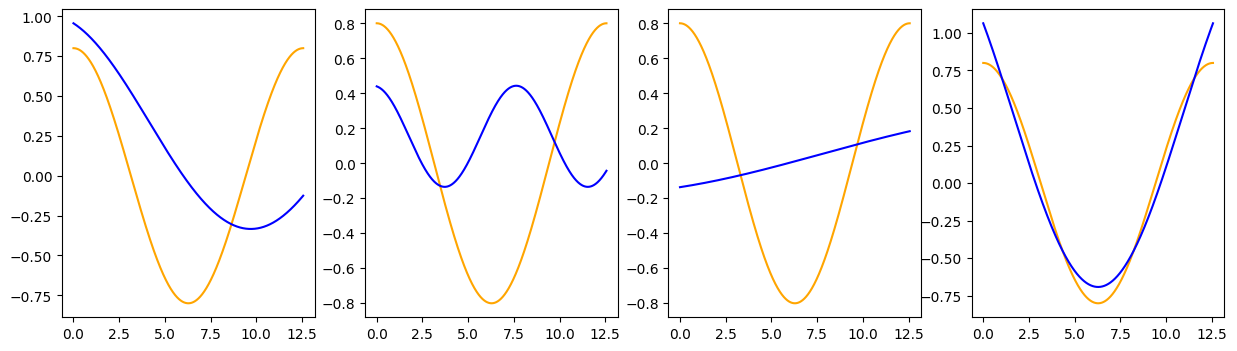

In [57]:
fig,axs=plt.subplots(1,4,figsize=(15,4))
axs[0].plot(X,Y,"orange",label="datos originales")
axs[0].plot(X,prediccion(X,a0,b0,c0,d0),"blue",label="prediccion")
axs[1].plot(X,Y,"orange",label="datos originales")
axs[1].plot(X,prediccion(X,a1,b1,c1,d1),"blue",label="prediccion")
axs[2].plot(X,Y,"orange",label="datos originales")
axs[2].plot(X,prediccion(X,a2,b2,c2,d2),"blue",label="prediccion")
axs[3].plot(X,Y,"orange",label="datos originales")
axs[3].plot(X,prediccion(X,a3,b3,c3,d3),"blue",label="prediccion")

In [59]:
import math
X_1= np.arange(30 , 20*math.pi, 0.001).astype(np.float32)

In [61]:
prediccion(X_1,a3,b3,c3,d3)

array([ 0.69397175,  0.6943506 ,  0.6947305 , ..., -0.6067481 ,
       -0.60660064, -0.60645306], dtype=float32)

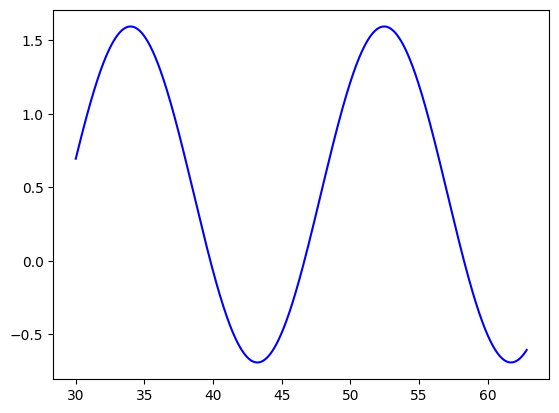

In [62]:
plt.plot(X_1,prediccion(X_1,a3,b3,c3,d3),"blue")

In [64]:
import sounddevice as sd

In [66]:
sd.play(prediccion(X_1,a3,b3,c3,d3))

In [67]:
ubicacion_1="D:/Machine/Tarea 4/test.csv"
df=pd.read_csv(ubicacion_1)

In [70]:
X_test=df["x"].values

In [71]:
TARGET=prediccion(X_test,a3,b3,c3,d3)

In [72]:
TARGET.shape

(50266,)

In [77]:
df["example_id"].shape

(50266,)

In [79]:
kaggle={"example_id":df["example_id"].values,"TARGET":TARGET}

In [80]:
kaggle_data=pd.DataFrame(kaggle)

In [82]:
kaggle_data.to_csv("D:/Machine/Tarea 4/kaggle.csv",index=False)